In [3]:
import pandas as pd #importa a biblioteca pandas para análise de dados

DADOS = "dados/precos_fone_ouvido.csv" #cria variavel dados para o arquivo csv

df = pd.read_csv(DADOS) #le o arquivo csv

df #imprime o conteudo do arquivo na tela

,Price
0,189.0
1,195.0
2,199.0
3,189.0
4,197.0
...,...
95,189.0
96,179.0
97,189.0
98,199.0


In [4]:
df.info() # valida os tipos de dads no arquivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [9]:
df.describe() #para entender o conjunto de valores numericos
 
with pd.option_context("float_format", "{:.2f}".format):
    display(df.describe()) #formata para aparecer apenas 2 casas após a virgula ao imprimir na tela com o display

,Price
count,100.00
mean,190.77
std,15.62
min,149.00
25%,179.00
50%,189.00
75%,199.00
max,239.00


### Análise Estatística de Preços de Fones de Ouvido

Esta tabela resume as principais estatísticas de um conjunto de dados de preços.

* **count (100):** Total de preços analisados.
* **mean (190.77):** Preço médio.
* **std (15.62):** Desvio padrão, indica a dispersão dos preços em relação à média.
* **min (149):** Preço mínimo.
* **25% (179):** Primeiro quartil (Q1). 25% dos preços são R$179 ou menos.
* **50% (189):** Mediana. O valor central, com metade dos preços abaixo e metade acima.
* **75% (199):** Terceiro quartil (Q3). 75% dos preços são 199,00 ou menos.
* **max (239):** Preço máximo.

**Interpretação:** A maioria dos preços (50% do meio) está entre 179,00 e 199,00, conforme indicado pelo intervalo interquartil (IQR)

In [10]:
df["Price"].value_counts() # procura na coluna Price(Preço) e conta quantas vezes cada valor aparece individualmente

Price
199.0    21
189.0    19
179.0    13
169.0     7
209.0     6
195.0     6
205.0     4
159.0     3
170.0     2
185.0     2
175.0     2
229.0     2
215.0     2
197.0     1
202.0     1
219.0     1
149.0     1
206.0     1
183.0     1
190.0     1
165.0     1
196.0     1
182.0     1
239.0     1
Name: count, dtype: int64

In [12]:
df["Price"].value_counts(bins=10) #bins divide o valor da variavel em intervalos

(194.0, 203.0]      30
(185.0, 194.0]      20
(176.0, 185.0]      17
(167.0, 176.0]      11
(203.0, 212.0]      11
(158.0, 167.0]       4
(212.0, 221.0]       3
(221.0, 230.0]       2
(148.909, 158.0]     1
(230.0, 239.0]       1
Name: count, dtype: int64

In [14]:
df["Price"].value_counts(bins=10).sort_index() # coloca os valores em ordem crescente

(148.909, 158.0]     1
(158.0, 167.0]       4
(167.0, 176.0]      11
(176.0, 185.0]      17
(185.0, 194.0]      20
(194.0, 203.0]      30
(203.0, 212.0]      11
(212.0, 221.0]       3
(221.0, 230.0]       2
(230.0, 239.0]       1
Name: count, dtype: int64

Aqui fica evidente a faixa de preço onde tem a maior incidencia fones de ouvido no mesmo valor (esta é a linha de raciocínio por trás do histograma)


### O que é um Histograma?

Um histograma é um gráfico que mostra a distribuição de frequência de dados numéricos. Para construir um histograma, o primeiro passo é agrupar o intervalo de valores - dividir todo o intervalo de valores em uma série de intervalos - e depois contar quantos valores caem em cada intervalo. Ele agrupa os dados em intervalos (chamados de bins ou "caixas") e plota a contagem ou frequência de ocorrência de dados em cada bin.

**Como interpretar:**
Eixo X: Representa os valores dos dados (ex: idade, preço, altura).

Eixo Y Mostra a frequência (contagem) de quantas vezes os valores do eixo X ocorreram.

Barras: A altura de cada barra indica a frequência dos dados naquele intervalo.

**Para que serve?**

Histograms são ótimos para visualizar rapidamente a forma dos seus dados, identificar a frequência de valores, e detectar a presença de outliers ou múltiplos picos (distribuições multimodais).

<Axes: xlabel='Price', ylabel='Count'>

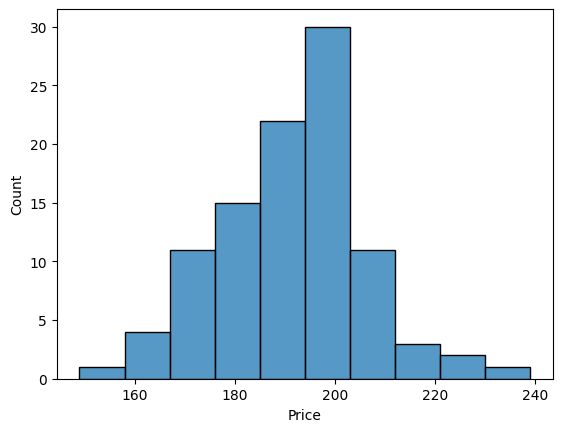

In [16]:
import seaborn as sns # seaborn fornece uma interface de alto nível para criar gráficos estatísticos e informativos, tornando a visualização de dados mais fácil e atraente.

sns.histplot(x="Price", data=df, bins=10) # histplot usado para histogramas, bins muda o intervalo de valores do histograma

<Axes: xlabel='Price', ylabel='Count'>

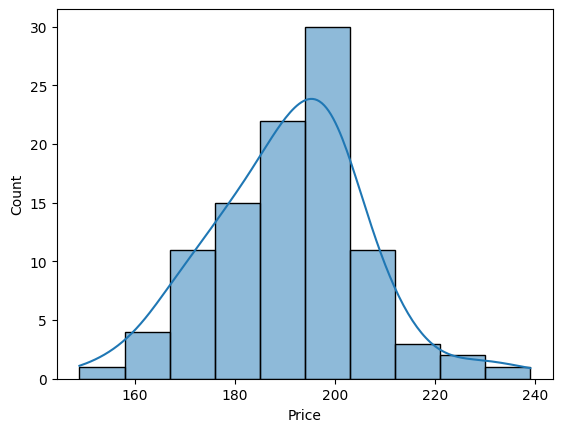

In [17]:
sns.histplot(x="Price", data=df, bins=10, kde=True) # Kernel Density Estimation(KDE) ajuda a visualizar de forma mais suave uma variável contínua quando comparado a um histograma.

## Boxplot

Um boxplot é um método para demonstrar graficamente a localidade (tendência central), dispersão e assimetria de grupos de dados numéricos através de seus quartis. 

Além da caixa em um boxplot, pode haver linhas (chamadas de *whiskers*, bigodes em portuês) que se estendem da caixa indicando variabilidade (distância entre os valores) fora dos quartis superiores e inferiores. Outliers que diferem significativamente do restante do conjunto de dados podem ser plotados como pontos individuais além dos bigodes no boxplot. Boxplots são não-paramétricos: eles exibem variação em amostras de uma população estatística sem fazer nenhuma suposição sobre a distribuição estatística subjacente. Os espaçamentos em cada subseção do boxplot indicam o grau de dispersão e assimetria dos dados. Boxplots podem ser desenhados horizontalmente ou verticalmente.

Um boxplot é uma maneira padronizada de exibir o conjunto de dados com base no resumo dos cinco números: o mínimo, o máximo, a mediana da amostra e o primeiro e terceiro quartis.

- Mínimo (Q0 ou 0º percentil): o ponto de dados mais baixo no conjunto de dados, excluindo quaisquer outliers
- Máximo (Q4 ou 100º percentil): o ponto de dados mais alto no conjunto de dados, excluindo quaisquer outliers
- Mediana (Q2 ou 50º percentil): o valor do meio no conjunto de dados
- Primeiro quartil (Q1 ou 25º percentil): também conhecido como quartil inferior, é a mediana da metade inferior do conjunto de dados.
- Terceiro quartil (Q3 ou 75º percentil): também conhecido como quartil superior, é a mediana da metade superior do conjunto de dados.

Além dos valores mínimo e máximo usados para construir um boxplot, outro elemento importante que também pode ser empregado para obter um boxplot é a amplitude interquartil (IQR), a distância entre os quartis superior e inferior.

# 00:20:30min